In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Generating Sample Dataset

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_clusters_per_class=1,
    class_sep=1,
    random_state=1
)

In [3]:
def plot_dataset(X, y, **kwargs):
    COLORMAP = np.array(['red','green'])
    X1, X2 = X[:,0], X[:,1]
    plt.scatter(X1, X2, c=COLORMAP[y])
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title(kwargs.get("title"))

(-2.0, 2.0, 0.0, 2.0)

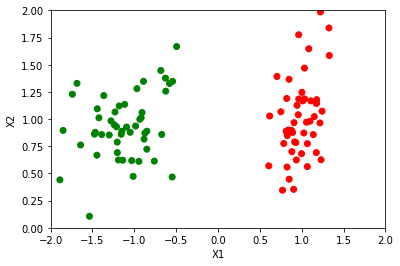

In [4]:
plot_dataset(X, y)
plt.axis([-2,2,0,2])

# Linear SVM

In [5]:
from sklearn.svm import LinearSVC
lin_svc = LinearSVC(C=float('inf')) # Hard Margin
lin_svc.fit(X, y)

LinearSVC(C=inf)

In [6]:
lin_svc.coef_

array([[-1.75450615,  0.07774679]])

In [7]:
lin_svc.intercept_

array([0.00384605])

In [8]:
w1, w2 = lin_svc.coef_[0]
b = lin_svc.intercept_[0]

Let, $x1$ and $x2$ be the features, $w1$ and $w2$ denote coefficients or weights, and bias is denoted by $b$.

Then, decision boundary is given by:
$$
\begin{align}
&w1.x1 + w2.x2 + b = 0\\
&x2 = -x1.\frac{w1}{w2}-\frac{b}{w2} 
\end{align}
$$

Support Vector for positive class:
$$
\begin{align}
&w1.x1 + w2.x2 + b = 1\\
&x2 = -x1.\frac{w1}{w2}-\frac{b}{w2} + \frac{1}{w2}
\end{align}
$$

Support Vector for negative class:
$$
\begin{align}
&w1.x1 + w2.x2 + b = -1\\
&x2 = -x1.\frac{w1}{w2}-\frac{b}{w2} - \frac{1}{w2}
\end{align}
$$

In [9]:
def plot_decision_boundary(X, y, w, b):
    w1, w2 = w
    X1, X2 = X[:,0], X[:,1]
    x1 = np.linspace(min(X1), max(X1), 10)
    x2 = -x1*w1/w2 - b/w2
    plot_dataset(X, y)
    plt.plot(x1, x2, 'b-') # plotting decision boundary
    plt.plot(x1, x2-1/w2, 'r--') # support vector (-ve class)
    plt.plot(x1, x2+1/w2, 'g--') # support vector (+ve class)

(-2.0, 2.0, 0.0, 2.0)

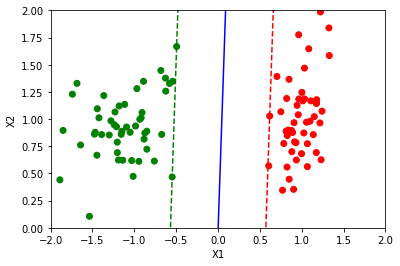

In [10]:
plot_decision_boundary(X, y, [w1, w2], b)
plt.axis([-2,2,0,2])

# Soft Margin Classifiers

## New Sample Dataset

In [11]:
X_smc, y_smc = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_clusters_per_class=1,
    class_sep=0.5,
    random_state=1
)

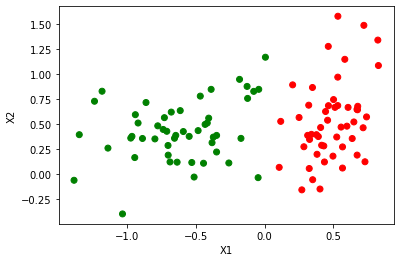

In [12]:
plot_dataset(X_smc, y_smc)

In [13]:
def dec_boundary_for_C(C, X, y):
    # fitting the decision boundary
    from sklearn.svm import LinearSVC
    lin_svc = LinearSVC(C=C)
    lin_svc.fit(X, y)
    
    # plotting decision boundary
    w = lin_svc.coef_[0]
    b = lin_svc.intercept_[0]
    plot_decision_boundary(X, y, w, b)

(-1.5, 1.0, -0.5, 2.0)

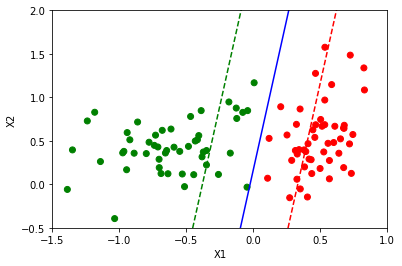

In [14]:
dec_boundary_for_C(1, X_smc, y_smc)
plt.axis([-1.5,1.0,-0.5,2])

(-1.5, 1.0, -0.5, 2.0)

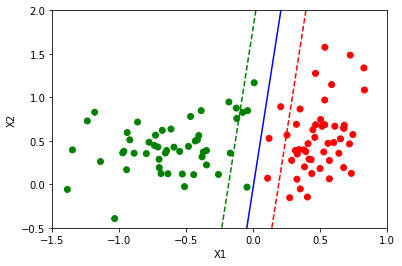

In [15]:
dec_boundary_for_C(10, X_smc, y_smc)
plt.axis([-1.5,1.0,-0.5,2])

/home/shaker/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(-1.5, 1.0, -0.5, 2.0)

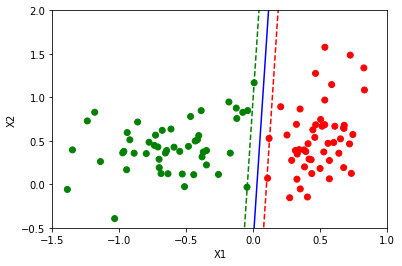

In [16]:
dec_boundary_for_C(float('inf'), X_smc, y_smc)
plt.axis([-1.5,1.0,-0.5,2])

# Polynomial SVM

In [17]:
from sklearn.datasets import make_moons

In [18]:
X, y = make_moons(n_samples=200, noise=0.15, random_state=69)

(-1.5, 2.5, -1.0, 2.0)

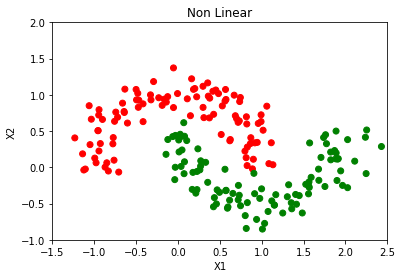

In [19]:
plot_dataset(X, y, title="Non Linear")
plt.axis([-1.5,2.5,-1,2])

## Adding polynomial features

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

lin_svc = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("lin_svm", LinearSVC(C=10, loss="hinge"))
])

lin_svc.fit(X, y)

/home/shaker/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('lin_svm', LinearSVC(C=10, loss='hinge'))])

In [21]:
def plot_non_lin_dec_boundary(clf, axis):
    a0 = np.linspace(axis[0], axis[1], 1000)
    a1 = np.linspace(axis[2], axis[3], 1000)
    x1, x2 = np.meshgrid(a0, a1)
    y_pred = clf.predict(np.c_[x1.ravel(), x2.ravel()])
    Z = y_pred.reshape(x1.shape)
    plt.contourf(x1, x2, Z, levels=2, colors=["red", "blue", "green"], alpha=0.3)

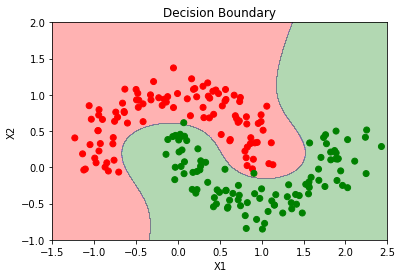

In [22]:
plot_non_lin_dec_boundary(lin_svc, [-1.5, 2.5, -1, 2])
plot_dataset(X, y, title="Decision Boundary")

## Using Polynomial Kernel

In [23]:
from sklearn.svm import SVC
poly_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("poly_svm", SVC(kernel='poly', C=10, degree=3, coef0=1))
])
poly_svm.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_svm', SVC(C=10, coef0=1, kernel='poly'))])

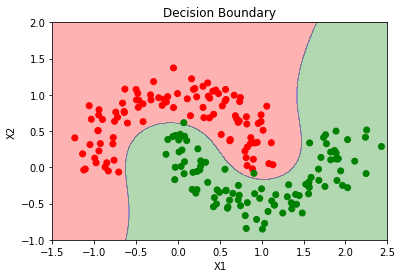

In [24]:
plot_non_lin_dec_boundary(poly_svm, [-1.5, 2.5, -1, 2])
plot_dataset(X, y, title="Decision Boundary")

In [25]:
def degree_fit(C, degree, coef0):
    poly_svm = Pipeline([
        ("scaler", StandardScaler()),
        ("poly_svm", SVC(kernel='poly', C=C, degree=degree, coef0=coef0))
    ])
    poly_svm.fit(X, y)
    plot_non_lin_dec_boundary(poly_svm, [-1.5, 2.5, -1, 2])
    plot_dataset(X, y, title=f"C={C}, degree={degree}, coef0={coef0}")

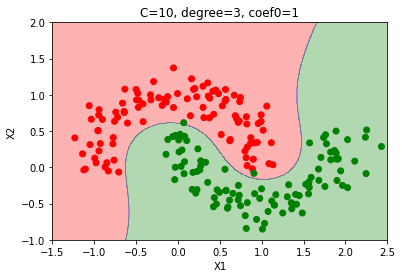

In [26]:
degree_fit(C=10, degree=3, coef0=1)

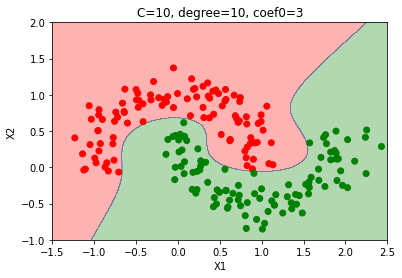

In [27]:
degree_fit(C=10, degree=10, coef0=3)

# SVM RBF kernel

In [28]:
X = np.linspace(-2, 2, 9)
y = np.array([0,0,0,1,1,1,1,0,0])

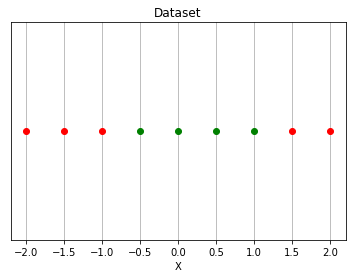

In [29]:
X0 = X[y==0]
X1 = X[y==1]
plt.plot(X0, np.zeros(len(X0)), 'ro')
plt.plot(X1, np.zeros(len(X1)), 'go')
plt.gca().get_yaxis().set_ticks([])
plt.xlabel("X")
plt.title("Dataset")
plt.grid(True)
plt.show()

Now, let us take $-1$ and $0.5$ as landmarks. Let's plot the their similarity curve using the equation below:
$$
\phi(x, \ell) = \exp(-\gamma ||x - \ell||^2)
$$
Let, $\gamma=0.3$.

In [30]:
lm1, lm2 = -0.5, 1
gamma = 1.3
X_sim = np.linspace(-2, 2, 50)
sim1 = np.exp(-gamma * (X_sim-lm1)**2)
sim2 = np.exp(-gamma * (X_sim-lm2)**2)

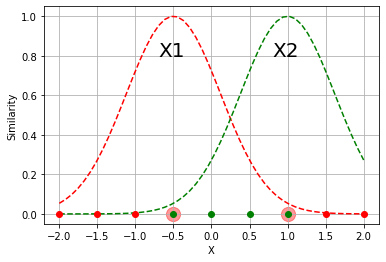

In [31]:
plt.plot(X_sim, sim1, 'r--')
plt.plot(X_sim, sim2, 'g--')
plt.plot(X0, np.zeros(len(X0)), 'ro')
plt.plot(X1, np.zeros(len(X1)), 'go')
plt.scatter([lm1,lm2], [0,0], s=200, c="red", alpha=0.4)
plt.xlabel("X")
plt.ylabel("Similarity")
plt.text(-.7, .8, "X1", fontsize=20)
plt.text(.8, .8, "X2", fontsize=20)
plt.grid(True)

Text(0, 0.5, 'X2')

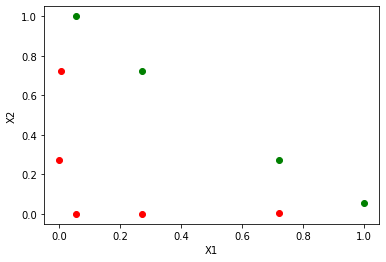

In [32]:
X1_x = np.exp(-gamma * (X0-lm1)**2)
X1_y = np.exp(-gamma * (X0-lm2)**2)
plt.plot(X1_x, X1_y, 'ro')

X2_x = np.exp(-gamma * (X1-lm1)**2)
X2_y = np.exp(-gamma * (X1-lm2)**2)
plt.plot(X2_x, X2_y, 'go')

plt.xlabel("X1")
plt.ylabel("X2")

(-0.1, 1.1, -0.1, 1.1)

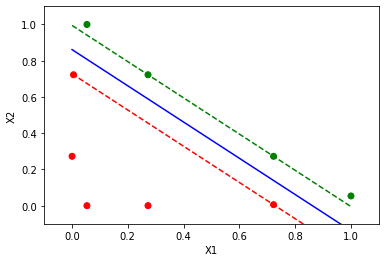

In [33]:
X1_s = np.exp(-gamma * (X-lm1)**2)
X2_s = np.exp(-gamma * (X-lm2)**2)
X_s = np.c_[X1_s, X2_s]
dec_boundary_for_C(float('inf'), X_s, y)
plt.axis([-0.1, 1.1, -0.1, 1.1])

### RBF on non-linear dataset

In [34]:
X, y = make_moons(n_samples=200, noise=0.15, random_state=69)

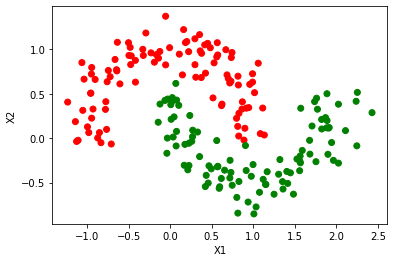

In [35]:
plot_dataset(X, y)

In [36]:
def svm_rbf_fit(C, gamma):
    poly_svm = Pipeline([
        ("scaler", StandardScaler()),
        ("rbf_svm", SVC(kernel='rbf', C=C, gamma=gamma))
    ])
    poly_svm.fit(X, y)
    plot_non_lin_dec_boundary(poly_svm, [-1.5, 2.5, -1, 2])
    plot_dataset(X, y, title=f"C={C}, gamma={gamma}")

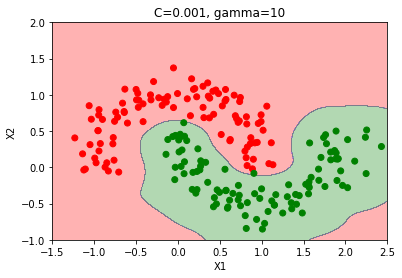

In [37]:
svm_rbf_fit(C=0.001, gamma=10)

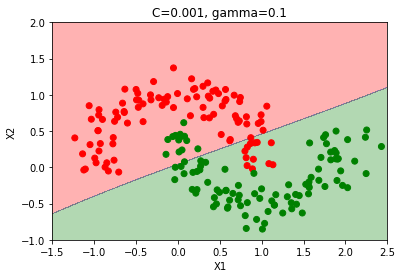

In [38]:
svm_rbf_fit(C=0.001, gamma=0.1)

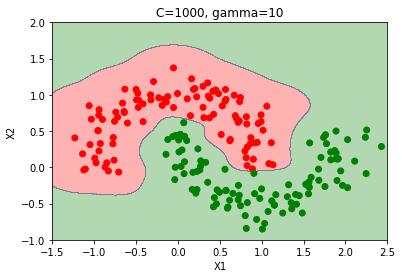

In [39]:
svm_rbf_fit(C=1000, gamma=10)

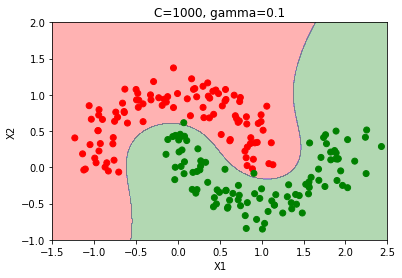

In [40]:
svm_rbf_fit(C=1000, gamma=0.1)

# SVM Regression

In [148]:
from sklearn.datasets import make_regression
X, y = make_regression(
    n_samples=100,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=20,
    random_state=42
)

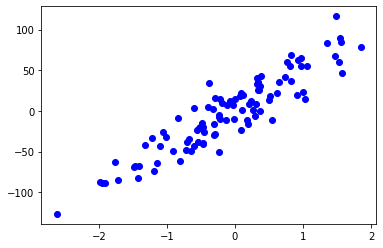

In [149]:
plt.plot(X, y, 'bo')

In [150]:
from sklearn.svm import LinearSVR
EPSILON = 30
lin_svr = LinearSVR(epsilon=EPSILON)
lin_svr.fit(X, y)

LinearSVR(epsilon=30)

In [151]:
b = lin_svr.intercept_[0]
w = lin_svr.coef_[0]
b, w

(0.4648160592364692, 27.017006860020857)

In [152]:
X_lin = np.linspace(-3, 3, 100)
y_lin = b + w*X_lin

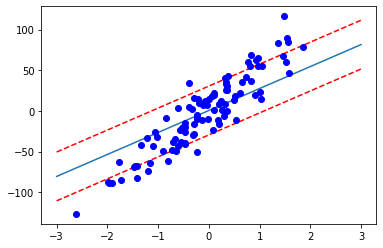

In [153]:
plt.plot(X_lin, y_lin)
plt.plot(X_lin, y_lin+EPSILON, 'r--')
plt.plot(X_lin, y_lin-EPSILON, 'r--')
plt.plot(X, y, 'bo')

In [154]:
def plot_svm_reg(clf, X, y):
    X_lin = np.linspace(min(X), max(X), 100)
    y_lin = clf.predict(X_lin.reshape(-1, 1))

    plt.plot(X, y, 'bo')
    plt.plot(X_lin, y_lin, 'k-', linewidth=2.5)
    plt.plot(X_lin, y_lin+clf.epsilon, 'r--', linewidth=2)
    plt.plot(X_lin, y_lin-clf.epsilon, 'r--', linewidth=2)

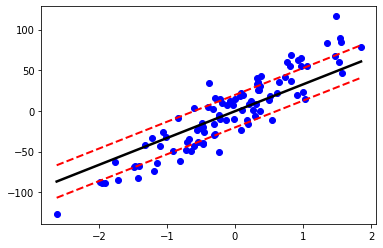

In [155]:
from sklearn.svm import LinearSVR
lin_svr = LinearSVR(epsilon=20)
lin_svr.fit(X, y)
plot_svm_reg(lin_svr, X, y)

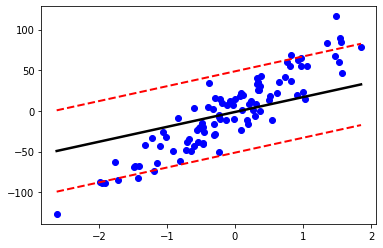

In [156]:
from sklearn.svm import LinearSVR
lin_svr = LinearSVR(epsilon=50)
lin_svr.fit(X, y)
plot_svm_reg(lin_svr, X, y)

## Non-Linear SVM Regression

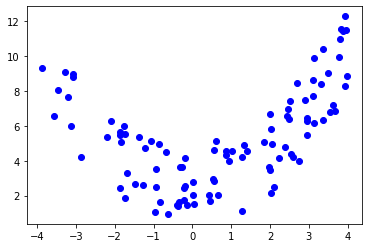

In [157]:
n_samples = 100
noise = 5
X = 8*np.random.rand(n_samples) - 4
y = 0.5*X**2 + noise*np.random.rand(n_samples)
X = X.reshape(-1, 1)
plt.plot(X, y, 'bo')

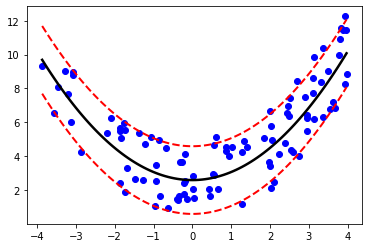

In [167]:
from sklearn.svm import SVR
svr = SVR(kernel="poly", epsilon=2, C=100, degree=2, gamma='scale')
svr.fit(X, y)
plot_svm_reg(svr, X, y)

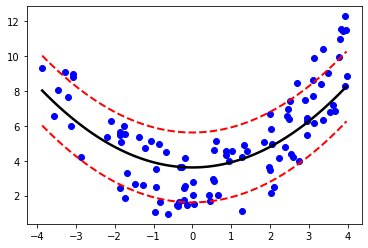

In [168]:
from sklearn.svm import SVR
svr = SVR(kernel="poly", epsilon=2, C=0.05, degree=2, gamma='scale')
svr.fit(X, y)
plot_svm_reg(svr, X, y)